In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

C:\Users\K VIGNESHWAR REDDY\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\K VIGNESHWAR REDDY\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\K VIGNESHWAR REDDY\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\K VIGNESHWAR REDDY\

In [10]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

def auto_select_accelerator():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        print("Running on TPU:", tpu.master())
    except ValueError:
        strategy = tf.distribute.get_strategy()
    print(f"Running on {strategy.num_replicas_in_sync} replicas")

    return strategy

In [12]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
training_set = train_datagen.flow_from_directory('C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [15]:
svm = tf.keras.models.Sequential()

# Step 1 - Convolution
svm.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))

# Step 2 - Pooling
svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
svm.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
svm.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
svm.add(tf.keras.layers.Dense(units=128, activation='relu'))

svm.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])


svm.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
____

In [16]:
svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
r=svm.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
313/313 [==============================] - 323s 1s/step - loss: 1.1380 - acc: 0.4722 - val_loss: 1.1104 - val_acc: 0.4610
Epoch 2/10
313/313 [==============================] - 218s 698ms/step - loss: 1.0336 - acc: 0.6894 - val_loss: 1.0508 - val_acc: 0.6370
Epoch 3/10
313/313 [==============================] - 219s 701ms/step - loss: 1.0080 - acc: 0.7529 - val_loss: 1.0189 - val_acc: 0.7190
Epoch 4/10
313/313 [==============================] - 218s 696ms/step - loss: 0.9950 - acc: 0.7810 - val_loss: 1.0330 - val_acc: 0.6780
Epoch 5/10
313/313 [==============================] - 221s 706ms/step - loss: 0.9807 - acc: 0.8191 - val_loss: 1.0143 - val_acc: 0.7270
Epoch 6/10
313/313 [==============================] - 328s 1s/step - loss: 0.9680 - acc: 0.8528 - val_loss: 0.9852 - val_acc: 0.7950
Epoch 7/10
313/313 [==============================] - 205s 656ms/step - loss: 0.9650 - acc: 0.85

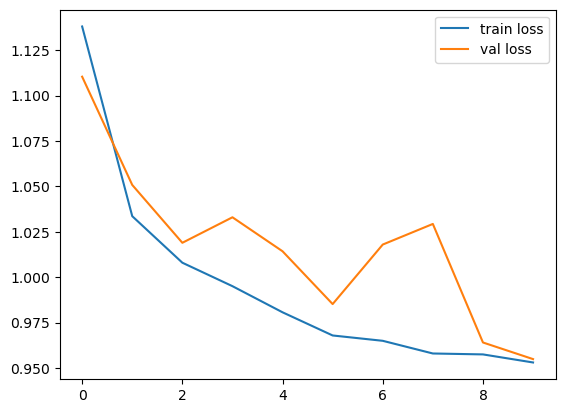

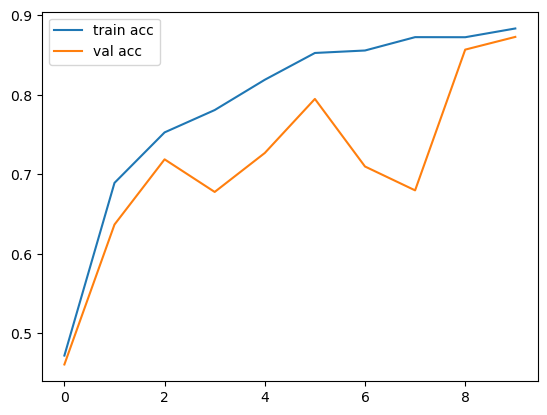

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
from tensorflow.keras.models import load_model

svm.save('SVM_Tomatoleaf.h5')

In [44]:
from tensorflow.keras.models import load_model
model = load_model('SVM_Tomatoleaf.h5')

In [93]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [94]:
# Load the trained model
model = load_model('SVM_Tomatoleaf.h5')

# Define the class labels
class_labels = ['Bacterial Spot', 'Early Blight', 'Late Blight', 'Leaf Mold', 'Septoria Leaf Spot', 'Spider Mites', 'Target Spot', 'Tomato Yellow Leaf Curl Virus', 'Tomato Mosaic Virus', 'Healthy']

In [95]:
# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [96]:
# Function to make predictions
def predict_disease(img_path):
    # Preprocess the input image
    img_array = preprocess_image(img_path)
    
    # Make the prediction
    prediction = model.predict(img_array)
    
    # Get the predicted class label
    predicted_class = class_labels[np.argmax(prediction)]
    
    return predicted_class

In [97]:
# Example usage
def show_prediction(image_path):
    # Preprocess the input image
    img_array = preprocess_image(image_path)
    
    # Display the input image
    plt.figure(figsize=(6, 6))
    plt.imshow(np.squeeze(img_array).astype('uint8'))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    
    # Make the prediction
    predicted_disease = predict_disease(image_path)
    print(f"The predicted disease is: {predicted_disease}")

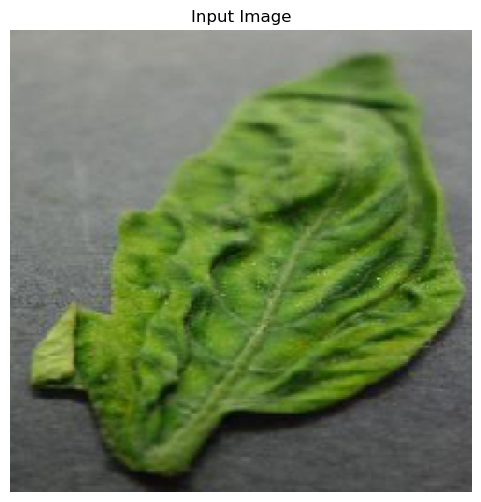

The predicted disease is: Tomato Yellow Leaf Curl Virus


In [98]:
example_image_path ="C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/fff6bf83-797c-4de4-83f7-39b74786fec4___UF.GRC_YLCV_Lab 03179.JPG"
show_prediction(example_image_path)

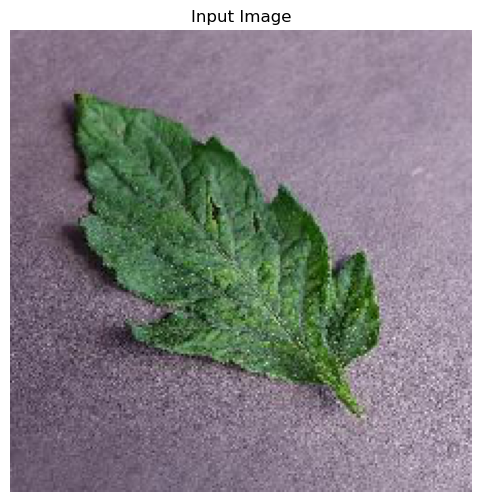

The predicted disease is: Septoria Leaf Spot


In [100]:
example_image_path ="C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/train/Tomato___Tomato_mosaic_virus/f833998e-f306-4f40-b702-3d4ab8f4ad27___PSU_CG 2331.JPG"
show_prediction(example_image_path)

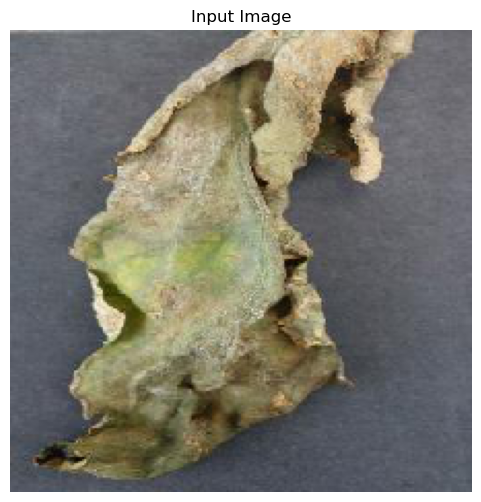

The predicted disease is: Late Blight


In [115]:
example_image_path = "C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/train/Tomato___Late_blight/fc4eb42f-062f-4840-80f5-3244866a1e3a___GHLB2 Leaf 125.2.JPG"
show_prediction(example_image_path)

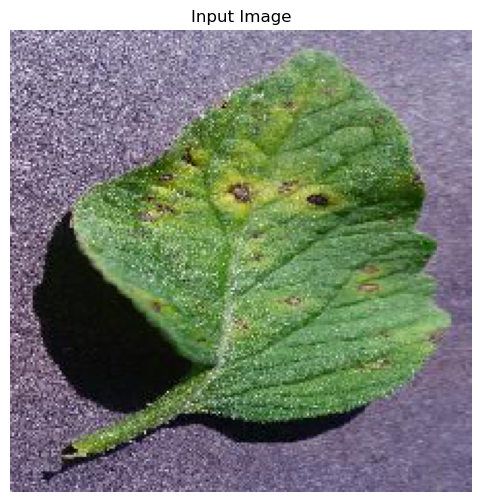

The predicted disease is: Septoria Leaf Spot


In [116]:
example_image_path ="C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/train/Tomato___Septoria_leaf_spot/ff38c095-8835-41e6-871d-dd81861f5292___JR_Sept.L.S 2557.JPG"
show_prediction(example_image_path)